In [2]:
import os
import sys

#home=os.path.expanduser("~") # HOME이 설정되어 있지 않으면 expanduser('~')를 사용한다.
#osn.environ["PYSPARK_PYTHON"] = "/usr/bin/python"
os.environ["SPARK_HOME"]=os.path.join(os.path.expanduser("~"),r"C:\Users\user\spark-2.0.0-bin-hadoop2.7\spark-2.0.0-bin-hadoop2.7")
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [3]:
import pyspark
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.sql.warehouse.dir", r"C:\Users\user\MyStudySpace\2019-2\BigData_Spark\src")\
    .getOrCreate()

## OLS
회귀모델은 OLS(ordinary least squares)를 최소화하여 도출
- OLS는 y실제 - y^예측 차이의 제곱을 합계낸 값
- OLS (Ordinary Least Square)를 최소화 사용하여 회귀식을 품.

In [1]:
# 데이터 생성
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

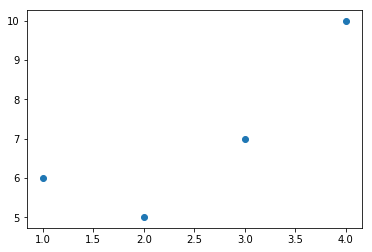

In [4]:
# 그래프
# 111 = 1행 1열의 첫번째
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

## 선형 회귀식 풀기
6=β0+β1×1

5=β0+β1×2

7=β0+β1×3

10=β0+β1×4

실제와 예측의 차이인 오류 (y−yhat)2를 최소화하는 베타 값을 구해보자.

(6−(β0+β1×1))2

(5−(β0+β1×2))2

(7−(β0+β1×3))2

(10−(β0+β1×4))2

위 식을 모두 더해서 총오류를 구하면:

f=210+4β20+30β21+20β0β1−56β0−154β1
위를 편미분하면:

∂f∂β0=8β0+20β1−56
∂f∂β1=20β0+60β1−154
이를 풀면:

β0=3.5
β1=1.4

In [5]:
yhat=x*1.4+3.5
print(yhat)

[4.9 6.3 7.7 9.1]


In [6]:
yhat-y

array([-1.1,  1.3,  0.7, -0.9])

In [7]:
# f
np.sum(np.power(yhat-y,2))

4.199999999999998

## 파이썬으로 미분

In [9]:
# differentiation
import sympy as sp
# b0 b1로 변수 설정 y=b1x + b0
b0,b1=sp.symbols('b0 b1')

In [10]:
# diff(f,b0)는 f함수를 b0에 대해서 미분하는 명령어
# diff(f,b1)는 f함수를 b1에 대해서 미분
f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1
fdiff_b0=sp.diff(f,b0)
fdiff_b1=sp.diff(f,b1)
print("fdiff with b0: ",fdiff_b0,"fdiff with b1: ",fdiff_b1)

('fdiff with b0: ', 8*b0 + 20*b1 - 56, 'fdiff with b1: ', 20*b0 + 60*b1 - 154)


In [12]:
# solve()로 해 구하기
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


## R^2
종속변수 dependent variable의 분산을 독립변수 independent variable(s)로 얼마나 예측할 수 있는지를 나타냄.
- TSS (Total Sum of Squared Errors ) = SSE (Sum of squared errors) + SSR (Residual Sum of squared errors)
    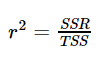

In [13]:
import numpy as np
x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

In [14]:
# 1을 넣어서 절편을 구헤주기
A=np.array([x,np.ones(9)])
print A

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [15]:
# T = 전치행렬
w0,w1=np.linalg.lstsq(A.T,y)[0]
print w0,w1

0.7166666666666671 19.188888888888894


C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [16]:
# 예측값 구하기
yhat=w0*x+w1
print yhat

[19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


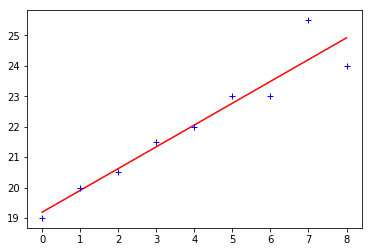

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'b+')
plt.show()

In [25]:
# R squared
SSR = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/TSS
print r_squared

0.9138385502471169


adjusted R-squared는 독립변수의 개수에 따라 과도한 R2를 수정한 값
    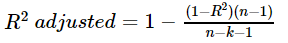
    - n = 데이터 개수
    - k = 독립변수 개수

In [26]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   # 0.9015 without -1
print adjusted_r_squared

0.8851180669961559


In [32]:
import statsmodels.api as sm
result = sm.OLS(y,A.T).fit()
print result.summary()
print result.rsquared, result.rsquared_adj
# 0.877643371323 0.863248473832

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           5.66e-05
Time:                        17:27:33   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.0

C:\Users\user\Anaconda2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


## matrix inverse method
회귀분석을 역행렬을 이용하여 풀기

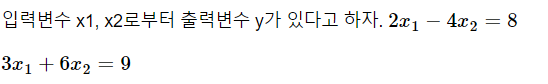

In [34]:
import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]

In [35]:
print "x: ", x, "y: ", y

x:  [[2, -4], [3, 6]] y:  [8, 9]


In [37]:
# set_printoptions(precision=2, suppress=True)는 출력 자릿수를 2자리로 제한 가능
np.set_printoptions(precision=2, suppress=True)
# inv(x) = x의 역행렬
xT = np.linalg.inv(x) 
print "x inv: \n", xT 

x inv: 
[[ 0.25  0.17]
 [-0.12  0.08]]


### identity matrix
x*xT는 1, 즉 identity matrix

In [40]:
# print np.eye(2)로도 대체 가능
print "identity matrix 'x * xT': \n", np.dot(x,xT)

identity matrix 'x * xT': 
[[1. 0.]
 [0. 1.]]


## β
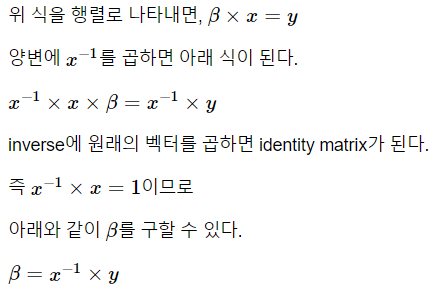

### inverse 계산

In [42]:
# matrix inverse
v=np.array([[2,3],[4,5]])
vI=np.linalg.inv(v)
print "v={0}\nv.I={1}".format(v,vI) #([[-2.5, 1.5], [ 2. , -1. ]])

v=[[2 3]
 [4 5]]
v.I=[[-2.5  1.5]
 [ 2.  -1. ]]


In [43]:
left=1./(2*5-3*4)
right=np.array([5,-3,-4,2])
print left*right #array([-2.5,  1.5,  2. , -1. ])

[-2.5  1.5  2.  -1. ]


### inverse로 β 계산
matrix inverse method를 풀어보자. numpy array로 행렬을 선언하고, 다음 식을 np.dot(), np.linalg.inv() 함수를 이용해서 풀면 x1, x2를 구할 수 있음.

In [44]:
import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

In [45]:
xI=np.linalg.inv(x)

In [46]:
w1,w2=np.dot(xI,y)
print(w1,w2)

(3.5, -0.25)


In [47]:
print 2*w1+(-4)*w2
print 3*w1+6*w2

8.0
9.0


In [48]:
print np.linalg.solve(x,y)

[ 3.5  -0.25]
